In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('train.xlsx')
df.head()

,ID,Order Date,Class,Region,Sub-Category,Sales
0,646.0,2018-12-30,Стандарт,Урал,Appliances,37229.08
1,907.0,2018-12-30,Стандарт,Владивосток,Bookcases,20994.61
2,908.0,2018-12-30,Стандарт,Владивосток,Phones,42133.86
3,909.0,2018-12-30,Стандарт,Владивосток,Binders,10612.00
4,1297.0,2018-12-30,Стандарт,Калиниград,Binders,28781.13


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ID            9800 non-null   float64       
 1   Order Date    9800 non-null   datetime64[ns]
 2   Class         9800 non-null   object        
 3   Region        9800 non-null   object        
 4   Sub-Category  9800 non-null   object        
 5   Sales         9800 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 459.5+ KB


### Задание 1

а) Какие подгруппы товаров наиболее часто покупают за все время продаж (минимум 4 группы)?

In [4]:
df['Sub-Category'].value_counts().head(4)

Binders        1492
Paper          1338
Furnishings     931
Phones          876
Name: Sub-Category, dtype: int64

б) Какие подгруппы товаров наиболее часто покупают за последние два года (минимум 4 группы)?

In [5]:
min_date = df['Order Date'].min()
max_date = df['Order Date'].max()
print(f"min_date = {min_date.strftime('%Y-%m-%d')}, max_date = {max_date.strftime('%Y-%m-%d')}")

min_date = 2015-01-03, max_date = 2018-12-30


In [6]:
df[df['Order Date'] >= max_date - pd.DateOffset(years=2)]['Sub-Category'].value_counts().head(4)

Binders        907
Paper          810
Furnishings    558
Phones         511
Name: Sub-Category, dtype: int64

в) Какие подгруппы товаров наиболее часто покупают за последний год(минимум 4 группы)?

In [7]:
df[df['Order Date'] >= max_date - pd.DateOffset(years=4)]['Sub-Category'].value_counts().head(4)

Binders        1492
Paper          1338
Furnishings     931
Phones          876
Name: Sub-Category, dtype: int64

P.S.

У нас датасет за период с 2015 по 2018. В условии задачи указано за последние два года. Требуется уточнение - за последние два годи от **текущей** даты или от **последней даты** в выборке? В своем решении я отталкивался от последнего.

In [8]:
#Процент охвата топ-4 подкатегорией
df_top4 = (df['Sub-Category'].value_counts(normalize=True)*100).head(4)
df_top4

Binders        15.224490
Paper          13.653061
Furnishings     9.500000
Phones          8.938776
Name: Sub-Category, dtype: float64

In [9]:
#Группировка данных по подкатегориям для подсчета их кол-ва и выручки  
df_g = df.groupby('Sub-Category', as_index=False).agg({'ID': 'count', 
                                                       'Sales': 'sum'})
df_g.columns = ['Sub-Category', 'count', 'sum']
df_g = df_g.sort_values('count', ascending=False).reset_index(drop=True)
df_g['count_perc'] = (df_g['count'].cumsum()/df_g['count'].sum()*100).round(1)
df_g['sum_perc'] = (df_g['sum'].cumsum()/df_g['sum'].sum()*100).round(1)
df_g

,Sub-Category,count,sum,count_perc,sum_perc
0,Binders,1492,3.391197e+07,15.2,15.1
1,Paper,1338,3.069077e+07,28.9,28.8
2,Furnishings,931,2.156507e+07,38.4,38.4
3,Phones,876,2.034327e+07,47.3,47.4
4,Storage,832,1.889280e+07,55.8,55.8
5,Art,785,1.783246e+07,63.8,63.8
6,Accessories,756,1.727495e+07,71.5,71.5
7,Chairs,607,1.412568e+07,77.7,77.7
8,Appliances,459,1.036418e+07,82.4,82.4
9,Labels,357,8.468587e+06,86.1,86.1


In [10]:
df['date_month_begin'] = df['Order Date'].dt.normalize() - pd.offsets.MonthBegin(1)
df

,ID,Order Date,Class,Region,Sub-Category,Sales,date_month_begin
0,646.0,2018-12-30,Стандарт,Урал,Appliances,37229.080,2018-12-01
1,907.0,2018-12-30,Стандарт,Владивосток,Bookcases,20994.610,2018-12-01
2,908.0,2018-12-30,Стандарт,Владивосток,Phones,42133.860,2018-12-01
3,909.0,2018-12-30,Стандарт,Владивосток,Binders,10612.000,2018-12-01
4,1297.0,2018-12-30,Стандарт,Калиниград,Binders,28781.130,2018-12-01
...,...,...,...,...,...,...,...
9795,1760.0,2015-01-05,Стандарт,Владивосток,Art,8639.472,2015-01-01
9796,740.0,2015-01-04,Стандарт,Урал,Labels,15246.050,2015-01-01
9797,741.0,2015-01-04,Стандарт,Урал,Storage,20415.810,2015-01-01
9798,742.0,2015-01-04,Стандарт,Урал,Binders,4559.085,2015-01-01


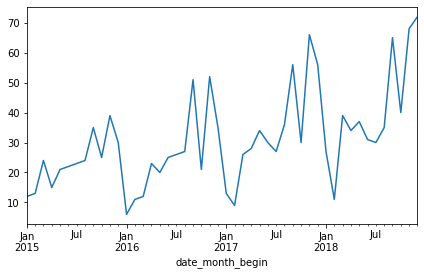

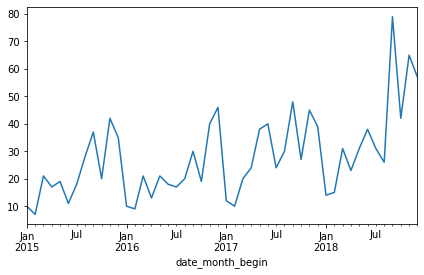

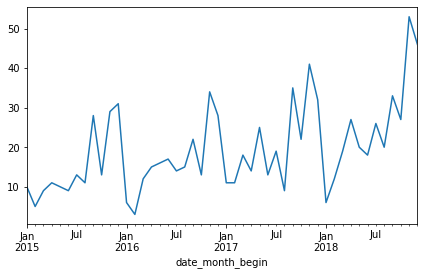

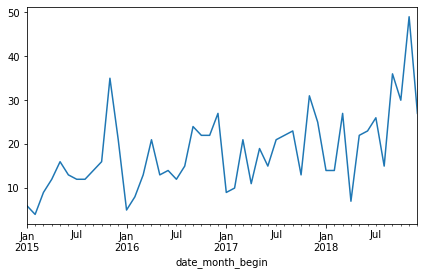

In [11]:
#график продаж по топ-4 подкатегорией
df['date_month_begin'] = df['Order Date'].dt.normalize() - pd.offsets.MonthBegin(1)

for cat in df_g['Sub-Category'].head(4):
    df[df['Sub-Category'] == cat].groupby('date_month_begin')['ID'].count().plot(figsize=(7, 4))
    plt.show()

Вывод:
По предоставленному датасету всего 16 подкатегорий.
Из них наиболее часто продаваемой подкатегорией являются `Binders, Paper, Furnishings, Phones`. Они составляют почти половину провожимых операций (**47%**) и доминируют по суммарной выручке.

Из графиков можно обнаружить увеличивающий спрос на данный сегмент товаров (тренд) и выявить сезонность. Мы видим, что в месяц январь наблюдаются резкие понижения спроса. Можно предположить, что это связано с переодичными проводимыми большими новогодними акциями/скидками в предверье нового года.

### Задание 2

Построить boxplot («Ящик с усами») на основе продаж (Sales). Найти мажоритарную черту (т.е. избавиться от аномалий и представить четкую картину распределения величин).

Можно использовать правило трех сигм. Однако любые другие решения приветствуются.

В данном случае, чтобы определить аномалии, использую 1% и 99% квантили по подкатегориям на каждый месяц.

In [12]:
df_5 = df.groupby(['Sub-Category', 'date_month_begin'], as_index=False)['Sales'].quantile(0.01).rename(columns={'Sales': '1%'})
df_95 = df.groupby(['Sub-Category', 'date_month_begin'], as_index=False)['Sales'].quantile(0.99).rename(columns={'Sales': '99%'})

In [13]:
df = df.merge(df_5, on=['Sub-Category', 'date_month_begin'], how='left')\
       .merge(df_95, on=['Sub-Category', 'date_month_begin'], how='left')
df        

,ID,Order Date,Class,Region,Sub-Category,Sales,date_month_begin,1%,99%
0,646.0,2018-12-30,Стандарт,Урал,Appliances,37229.080,2018-12-01,5131.76417,43321.6768
1,907.0,2018-12-30,Стандарт,Владивосток,Bookcases,20994.610,2018-12-01,2203.78100,43277.5530
2,908.0,2018-12-30,Стандарт,Владивосток,Phones,42133.860,2018-12-01,1532.93202,42040.3718
3,909.0,2018-12-30,Стандарт,Владивосток,Binders,10612.000,2018-12-01,1808.39993,43318.1065
4,1297.0,2018-12-30,Стандарт,Калиниград,Binders,28781.130,2018-12-01,1808.39993,43318.1065
...,...,...,...,...,...,...,...,...,...
9795,1760.0,2015-01-05,Стандарт,Владивосток,Art,8639.472,2015-01-01,1326.24508,44357.1920
9796,740.0,2015-01-04,Стандарт,Урал,Labels,15246.050,2015-01-01,10189.04420,18334.2750
9797,741.0,2015-01-04,Стандарт,Урал,Storage,20415.810,2015-01-01,5196.91186,44155.5997
9798,742.0,2015-01-04,Стандарт,Урал,Binders,4559.085,2015-01-01,2857.30176,39822.2354


In [14]:
df[(df['Sales'] < df['1%']) | (df['Sales'] > df['99%'])]

,ID,Order Date,Class,Region,Sub-Category,Sales,date_month_begin,1%,99%
2,908.0,2018-12-30,Стандарт,Владивосток,Phones,42133.860,2018-12-01,1532.93202,42040.3718
12,5457.0,2018-12-29,Стандарт,Калиниград,Fasteners,42589.860,2018-12-01,1491.85739,42579.8250
22,573.0,2018-12-28,Стандарт,Владивосток,Binders,44558.370,2018-12-01,1808.39993,43318.1065
34,7485.0,2018-12-28,Стандарт,Урал,Art,42642.820,2018-12-01,1821.40915,42562.9045
42,5475.0,2018-12-26,Same Day,Урал,Storage,1791.681,2018-12-01,2151.48232,44393.4639
...,...,...,...,...,...,...,...,...,...
9768,764.0,2015-01-13,Второй класс,Москва,Envelopes,3368.102,2015-01-01,3463.09229,37121.0682
9773,2979.0,2015-01-13,Второй класс,Москва,Chairs,32544.450,2015-01-01,32639.61940,37971.4564
9775,4939.0,2015-01-13,Стандарт,Калиниград,Bookcases,25432.230,2015-01-01,5455.82920,25349.6028
9779,717.0,2015-01-11,Первый класс,Владивосток,Furnishings,43349.210,2015-01-01,2009.57454,43190.4608


Если в качестве пороговых значений взять 2% и 98% квантили, то общая сумма аномальных значений будет от текущего датасета составлять 1474 записей (15%).

### Задание 3

Для этого задания необходимо разбить все покупки на энное количество групп “Sale_group” (Допустим маленькие продажи, средние и высокие) на основе Sales.

Сгруппировать данные на основе региона и группы продаж (Region, Sale_group). Определить основные тенденции и паттерны. Выделить наиболее «прибыльную» группу.


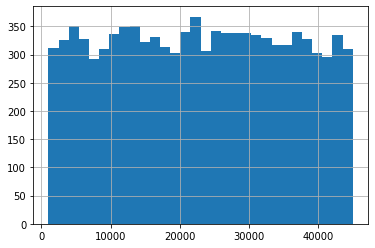

In [15]:
df['Sales'].hist(bins=30)
plt.show()

In [16]:
def cat_sales(row):
    if row < 15000:
        return 'Маленькие продажи'
    elif row < 35000:
        return 'Средние продажи'
    elif row >= 35000:
        return 'Крупные продажи'
    return 'Нет данных'
df['Sale_group'] = df['Sales'].apply(cat_sales)
df.head()

,ID,Order Date,Class,Region,Sub-Category,Sales,date_month_begin,1%,99%,Sale_group
0,646.0,2018-12-30,Стандарт,Урал,Appliances,37229.08,2018-12-01,5131.76417,43321.6768,Крупные продажи
1,907.0,2018-12-30,Стандарт,Владивосток,Bookcases,20994.61,2018-12-01,2203.78100,43277.5530,Средние продажи
2,908.0,2018-12-30,Стандарт,Владивосток,Phones,42133.86,2018-12-01,1532.93202,42040.3718,Крупные продажи
3,909.0,2018-12-30,Стандарт,Владивосток,Binders,10612.00,2018-12-01,1808.39993,43318.1065,Маленькие продажи
4,1297.0,2018-12-30,Стандарт,Калиниград,Binders,28781.13,2018-12-01,1808.39993,43318.1065,Средние продажи


In [17]:
df_total = df.groupby(['Region', 'Sale_group'])[['Sales']].sum()
df_total['sum_perc'] = (df_total['Sales']/df_total['Sales'].sum()*100).round(1)
df_total                         

Sales  sum_perc
Region      Sale_group                               
Владивосток Крупные продажи    2.565197e+07      11.4
            Маленькие продажи  7.156561e+06       3.2
            Средние продажи    3.114415e+07      13.9
Калиниград  Крупные продажи    2.705971e+07      12.0
            Маленькие продажи  8.184268e+06       3.6
            Средние продажи    3.668632e+07      16.3
Москва      Крупные продажи    1.478915e+07       6.6
            Маленькие продажи  4.011830e+06       1.8
            Средние продажи    1.809067e+07       8.1
Урал        Крупные продажи    1.953817e+07       8.7
            Маленькие продажи  5.868462e+06       2.6
            Средние продажи    2.645195e+07      11.8

Наиболее продаваемые подкатегории относятся к Средним продажам (от 15 тыс до 35 тыс). Они составляют 50% продаж. Самый популярный город по данному критерию среди них - Калининград (16%).